In [1]:
%matplotlib inline
import urllib2
import pandas as pd
#Графики
import matplotlib.pyplot as plt
from datetime import datetime
#Работа с файлами
import glob


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
url_template = 'https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_provinceData.php?country=UKR&provinceID={index}&year1={year1}&year2={year2}&type=Mean'

right_ID = [22,24,23,25,3,4,8,19,20,21,9,0,10,11,12,13,14,15,16,0,17,18,6,1,2,7,5]

for i in range(1,28):
    url = url_template.format(index=i,year1=1981,year2=2017)
    vhi_url = urllib2.urlopen(url)
    file_name = 'vhi-id-{index}-{date}.csv'
    dn = datetime.now()
    dn = dn.date()
    if i==12:
        ID = 'Kyiv'
    elif i==20:
        ID = "Sevastopol'"
    else:        
        ID = right_ID[i-1]
    file_name = file_name.format(index=ID,date=dn)
    out = open(r"/home/stepan/iPython/csv/%s" % file_name,'wb')
    out.write(vhi_url.read())
    out.close()

print 'Files have downloaded...'

Files are downloaded...


In [7]:
i = raw_input("Write index of province...[1,25]  ")

file_name = ''

if int(i)<10:
    for f in glob.glob('/home/stepan/iPython/csv/vhi-id-?-????-??-??.csv'):
        if i==f[32]:
            file_name=f
            break
else:
    for f in glob.glob('/home/stepan/iPython/csv/vhi-id-??-????-??-??.csv'):
        if i==f[32:34]:
            file_name=f
            break

file_name=file_name[25:]

        
df = pd.read_csv(r"/home/stepan/iPython/csv/%s" % file_name, index_col=False,delim_whitespace=True, engine='python' )
df.to_csv(r"/home/stepan/iPython/csv/cleaned/%s" % file_name, sep = ',')
df = pd.read_csv(r"/home/stepan/iPython/csv/cleaned/%s" % file_name, index_col=False,sep = '\,*\"*',engine='python')

del df['Unnamed: 0']
df = df.dropna(axis = 1, how = 'all')
df.columns = [u'Year',u'Week',u'SMN', u'SMT', u'VCI', u'TCI', u'VHI']

Write index of province...[1,25]  7


In [8]:
y = raw_input("Write year...[1981,2017]")
def extremums(year):
    date = df[df.Year==year]
    return date.loc[date['VHI'].idxmax()], date.loc[date['VHI'].idxmin()] 

print extremums(y)

Write year...[1981,2017]1990
(Year      1990
Week        19
SMN      0.367
SMT     296.46
VCI      84.34
TCI      55.93
VHI      70.13
Name: 441, dtype: object, Year      1990
Week        48
SMN      0.082
SMT     274.41
VCI      40.05
TCI      17.75
VHI       28.9
Name: 470, dtype: object)


In [9]:
extreme_drought = df[df.VHI<15]
extreme_drought
#print(df[df.Year=='2001'])
#df = df['Year'].astype('float64')
#print df.dtypes

,Year,Week,SMN,SMT,VCI,TCI,VHI
1292,2007,27.0,0.283,308.65,24.17,4.34,14.26
1293,2007,28.0,0.270,308.87,23.03,3.74,13.39
1294,2007,29.0,0.261,308.88,23.44,3.22,13.33
1295,2007,30.0,0.249,308.81,23.47,2.66,13.06
1296,2007,31.0,0.236,308.75,23.51,2.75,13.13
1297,2007,32.0,0.223,308.57,22.92,2.09,12.51
1298,2007,33.0,0.212,308.29,21.31,1.80,11.55
1299,2007,34.0,0.201,307.86,20.12,1.65,10.88
1300,2007,35.0,0.194,306.87,20.45,1.68,11.06
1301,2007,36.0,0.187,305.11,22.32,1.77,12.05


In [10]:
moderate_drought = df[df.VHI<35]
moderate_drought

,Year,Week,SMN,SMT,VCI,TCI,VHI
24,1982,7.0,0.045,267.94,28.65,41.32,34.99
25,1982,8.0,0.047,270.05,26.07,41.95,34.01
26,1982,9.0,0.048,272.25,23.24,42.36,32.80
27,1982,10.0,0.053,274.64,22.37,43.58,32.98
28,1982,11.0,0.064,277.23,25.52,42.90,34.21
29,1982,12.0,0.079,280.57,29.64,39.65,34.64
31,1982,14.0,0.115,287.30,35.70,32.04,33.87
32,1982,15.0,0.130,289.33,35.45,32.99,34.22
57,1982,40.0,0.143,292.42,27.70,39.77,33.73
58,1982,41.0,0.121,289.84,22.99,37.40,30.20


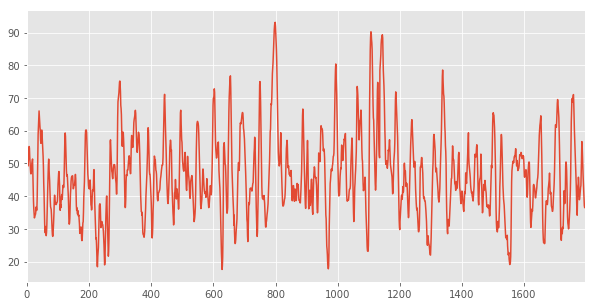

In [6]:
df['VHI'].plot()